## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [79]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

## Data exploration

In [80]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,5.239288,0,0,0,0,0,130,89,195.433613,7.309465,2.191402,23.207131,80.644448,2.926489,240.575604,137.142172,5.277706,9.867489,3.177054,14.331815,184.518899,133.107066,30.859157,320.668245,1,1,5.408175,0,0,0,6.973771,1.541242,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,6.401662,0,0,0,0,0,127,103,73.606489,4.357399,0.584633,27.145254,118.026779,3.496617,207.392143,136.744038,3.883738,9.411840,2.626317,11.397473,253.709988,131.987735,27.157762,334.818155,0,0,3.229984,1,0,1,0.465757,4.224176,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,8.440859,0,0,0,0,0,118,102,163.084321,8.235078,0.527432,29.733737,19.283249,3.549633,105.821102,143.887896,4.051049,8.705635,4.246865,16.727631,221.399305,183.307380,51.888571,162.784996,0,1,8.367022,0,0,0,4.537944,6.061171,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,5.527100,0,0,0,0,0,163,87,98.794331,

In [7]:
df.shape # number of rows and columns

(1659, 54)

In [8]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [9]:
# summary of the DataFrame (data types and number of non-null values in each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [10]:
# statistical summaries of the numerical columns
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. 

In [11]:
# Display the summary statistics of the dataset
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)


In [ ]:
## More code to be adde here (maybe)

In [12]:
# check for missing values
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [13]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
print(df.describe(include='all'))


               Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.00000          1659.000000   
mean     54.441230     0.515371     0.71308             0.977697   
std      20.549757     0.499914     1.00043             0.776686   
min      20.000000     0.000000     0.00000             0.000000   
25%      36.000000     0.000000     0.00000             0.000000   
50%      54.000000     1.000000     0.00000             1.000000   
75%      72.000000     1.000000     1.00000             2.000000   
max      90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.4714

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

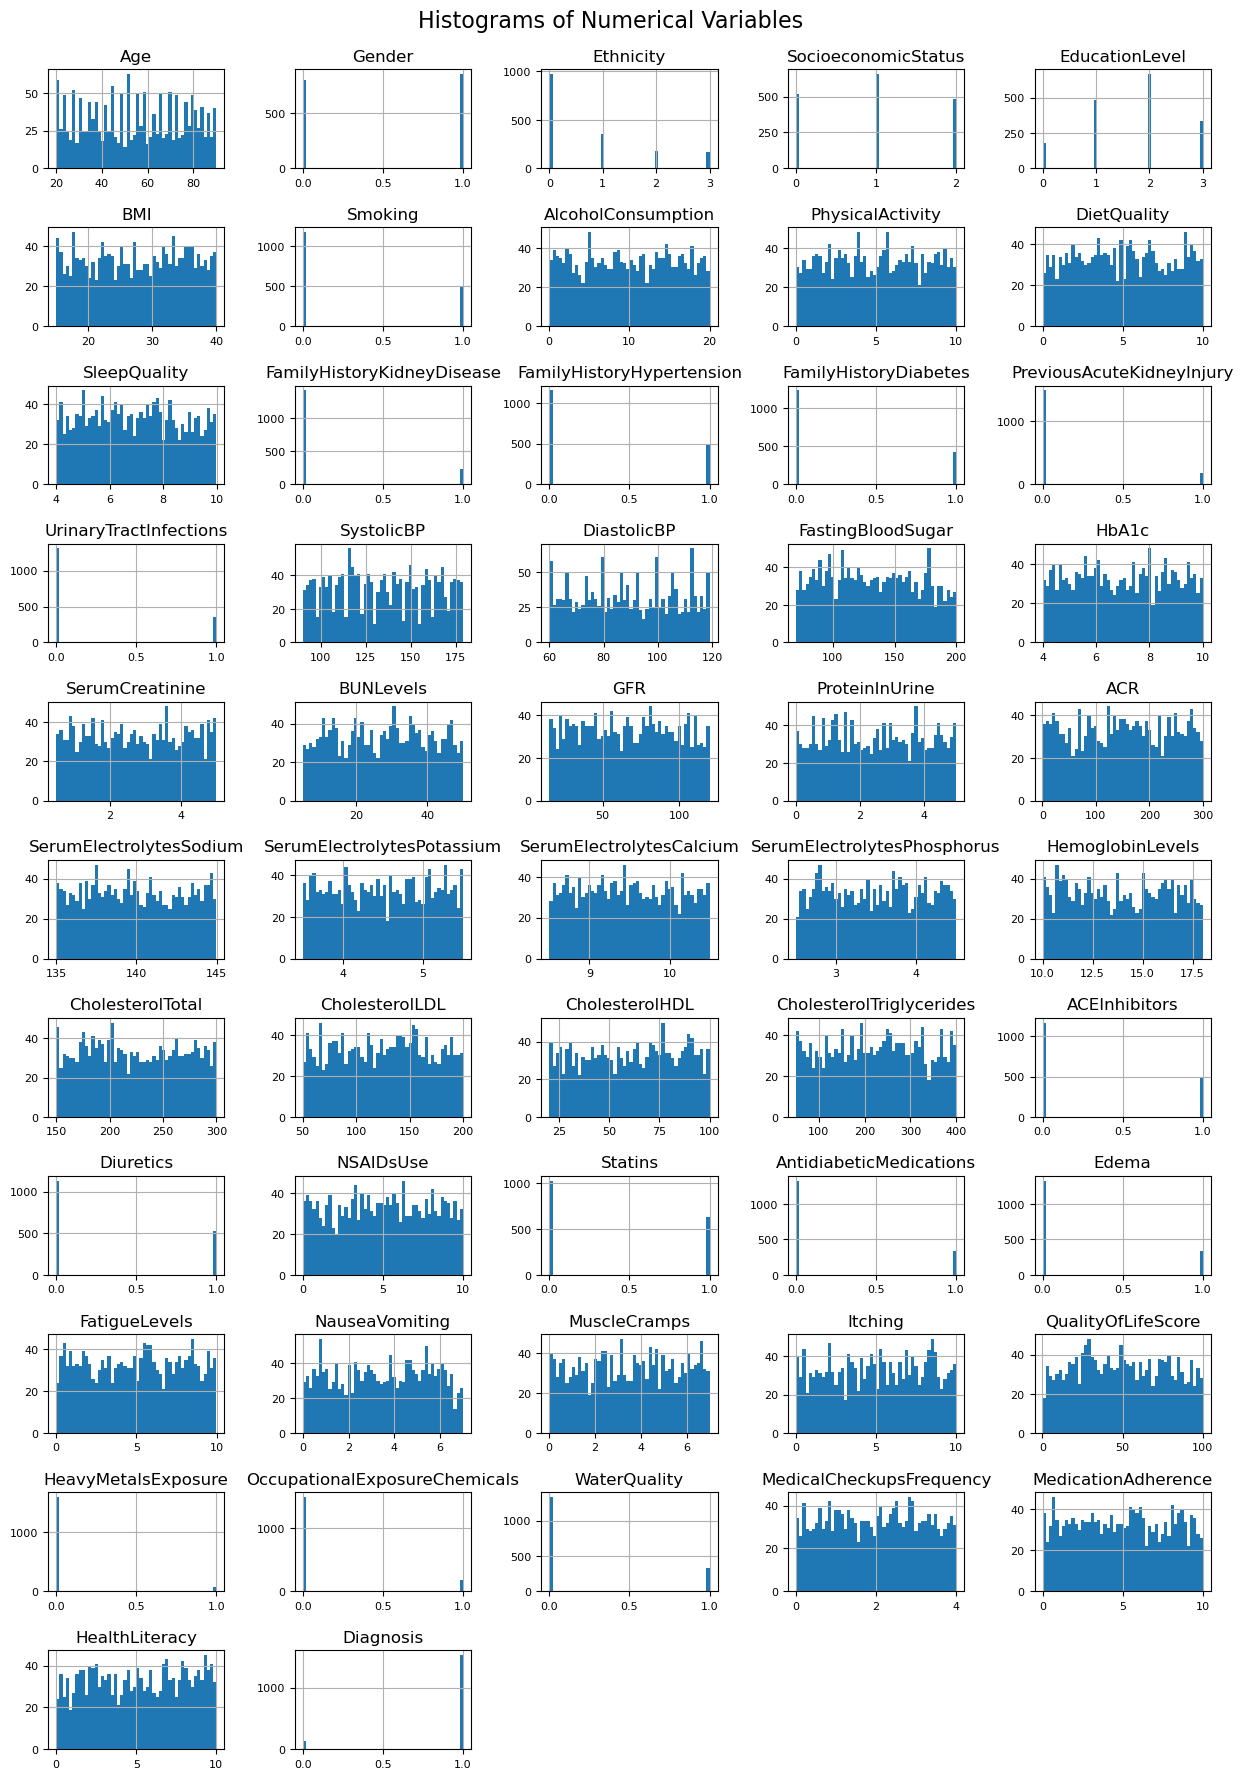

In [14]:
# Distribution of numerical variables in the df dataset
# Each histogram represents the frequency distribution of a numerical variable to gain insights into data distribution and skewness of data

df.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8, layout=(len(df.columns) // 5 + 1, 5))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)  
plt.subplots_adjust(top=0.95, hspace=0.6, wspace=0.4)  
plt.show()


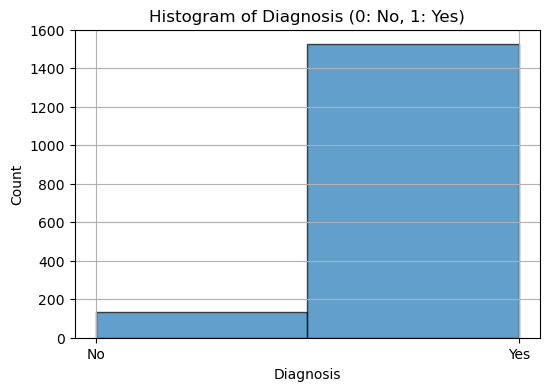

In [15]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis
# Plotting the histogram for 'Diagnosis'
plt.figure(figsize=(6, 4))  
plt.hist(df['Diagnosis'], bins=2, edgecolor='black', alpha=0.7, align='mid')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Histogram of Diagnosis (0: No, 1: Yes)')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace x-axis ticks with 'No' and 'Yes'
plt.grid(True)  
plt.show()

The dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

In [77]:
# Add code for scatter plot

# Katreyna
### To be done

Scatterplot showing 'GFR' and 'SerumCreatinine'

In [78]:
# Add code for scatter plot

# Katreyna 
### To be done


For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

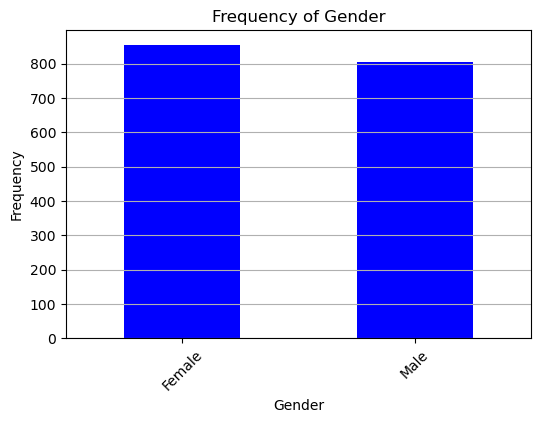

Distribution Summary of Gender:
Gender
Female    51.537071
Male      48.462929
Name: proportion, dtype: float64



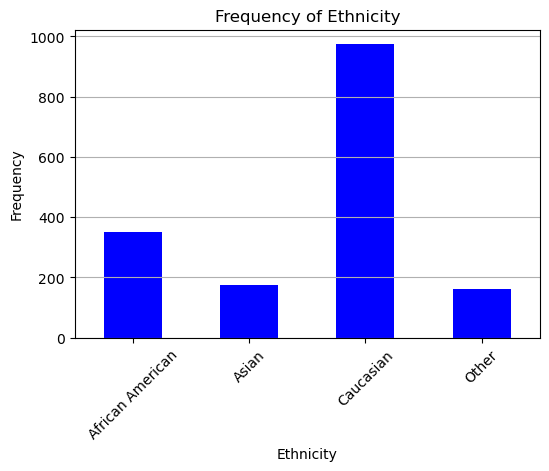

Distribution Summary of Ethnicity:
Ethnicity
African American    21.036769
Asian               10.488246
Caucasian           58.710066
Other                9.764919
Name: proportion, dtype: float64



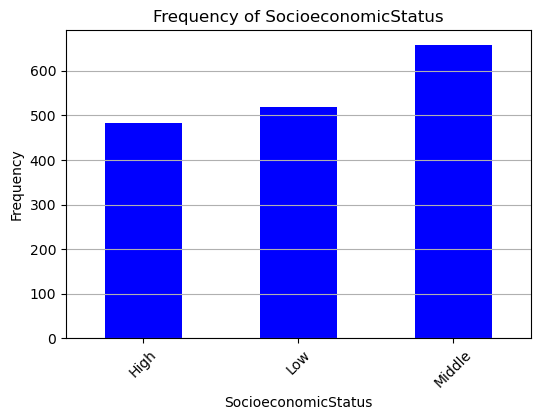

Distribution Summary of SocioeconomicStatus:
SocioeconomicStatus
High      29.053647
Low       31.283906
Middle    39.662447
Name: proportion, dtype: float64



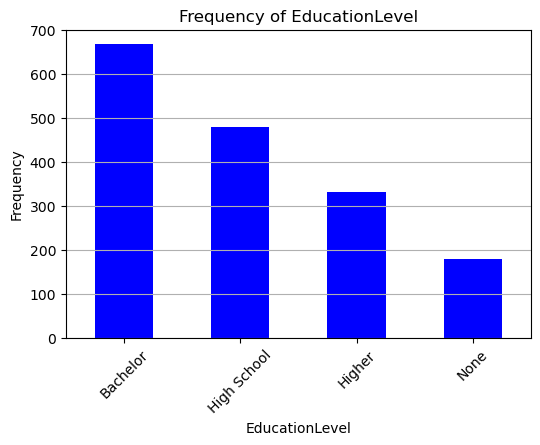

Distribution Summary of EducationLevel:
EducationLevel
Bachelor       40.265220
High School    28.933092
Higher         19.951778
None           10.849910
Name: proportion, dtype: float64



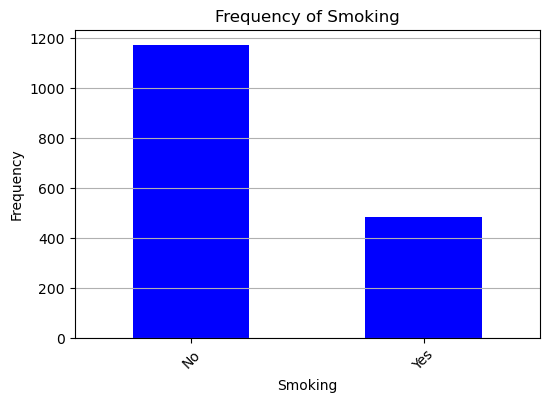

Distribution Summary of Smoking:
Smoking
No     70.705244
Yes    29.294756
Name: proportion, dtype: float64



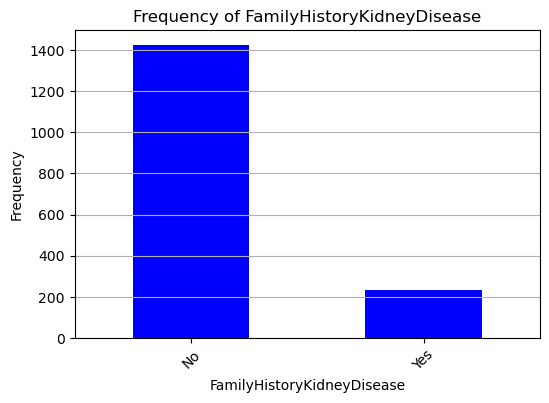

Distribution Summary of FamilyHistoryKidneyDisease:
FamilyHistoryKidneyDisease
No     85.895118
Yes    14.104882
Name: proportion, dtype: float64



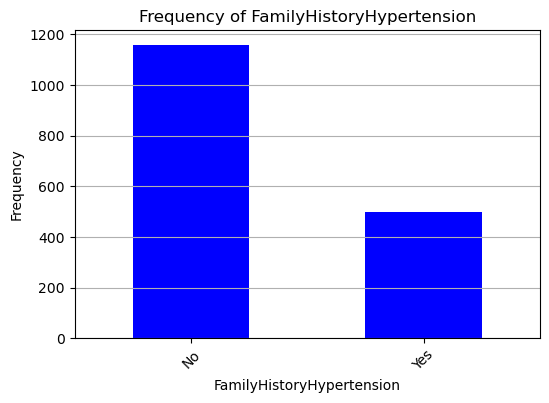

Distribution Summary of FamilyHistoryHypertension:
FamilyHistoryHypertension
No     69.861362
Yes    30.138638
Name: proportion, dtype: float64



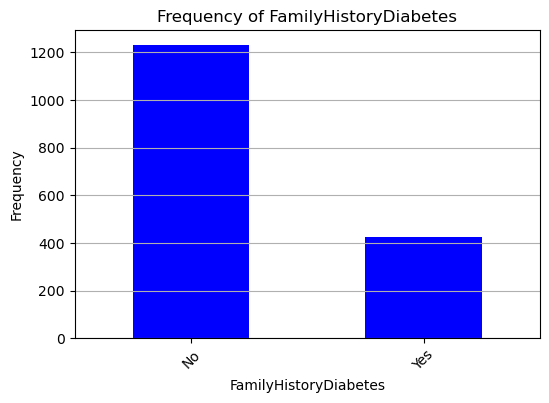

Distribution Summary of FamilyHistoryDiabetes:
FamilyHistoryDiabetes
No     74.261603
Yes    25.738397
Name: proportion, dtype: float64



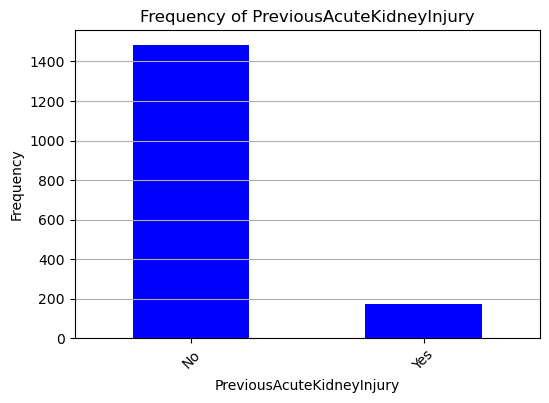

Distribution Summary of PreviousAcuteKidneyInjury:
PreviousAcuteKidneyInjury
No     89.451477
Yes    10.548523
Name: proportion, dtype: float64



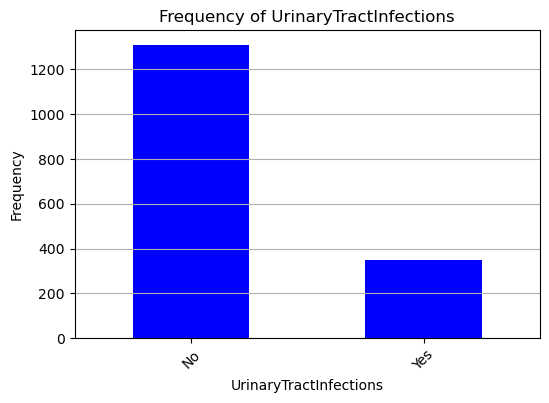

Distribution Summary of UrinaryTractInfections:
UrinaryTractInfections
No     78.963231
Yes    21.036769
Name: proportion, dtype: float64



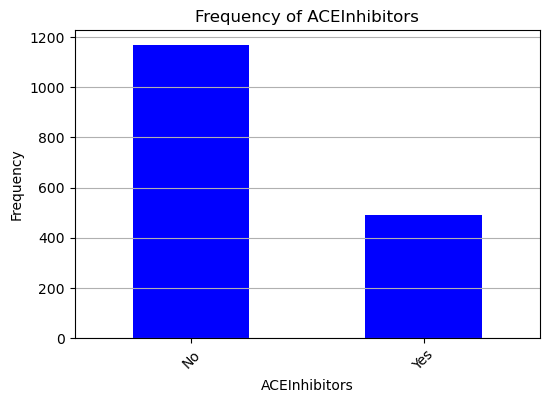

Distribution Summary of ACEInhibitors:
ACEInhibitors
No     70.464135
Yes    29.535865
Name: proportion, dtype: float64



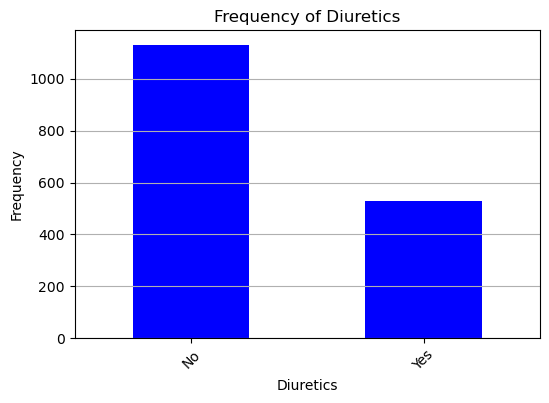

Distribution Summary of Diuretics:
Diuretics
No     68.173599
Yes    31.826401
Name: proportion, dtype: float64



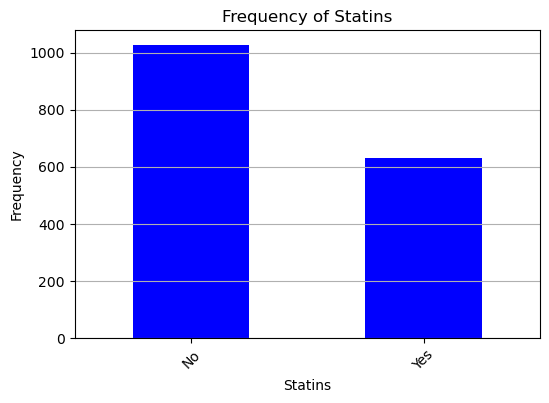

Distribution Summary of Statins:
Statins
No     61.904762
Yes    38.095238
Name: proportion, dtype: float64



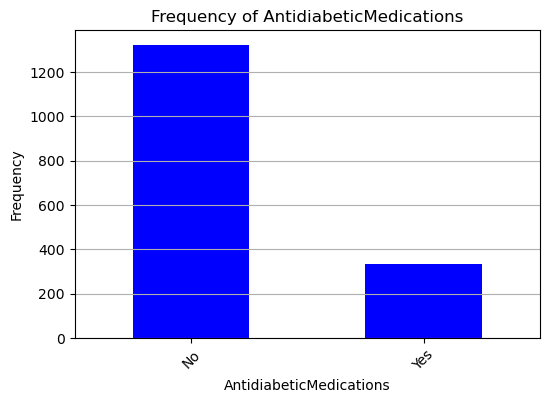

Distribution Summary of AntidiabeticMedications:
AntidiabeticMedications
No     79.746835
Yes    20.253165
Name: proportion, dtype: float64



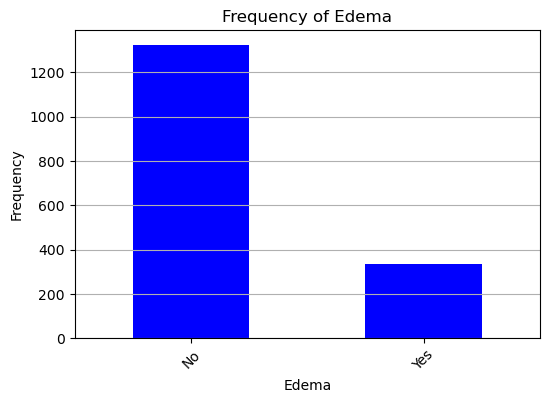

Distribution Summary of Edema:
Edema
No     79.807113
Yes    20.192887
Name: proportion, dtype: float64



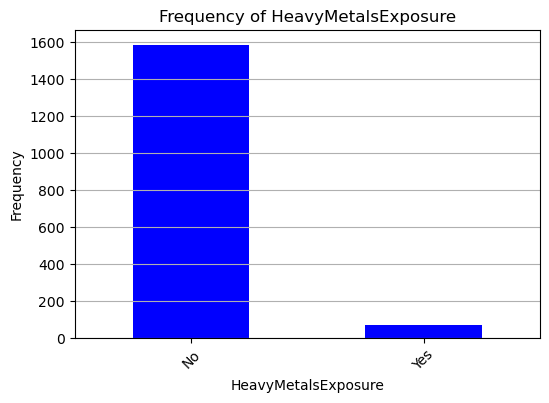

Distribution Summary of HeavyMetalsExposure:
HeavyMetalsExposure
No     95.599759
Yes     4.400241
Name: proportion, dtype: float64



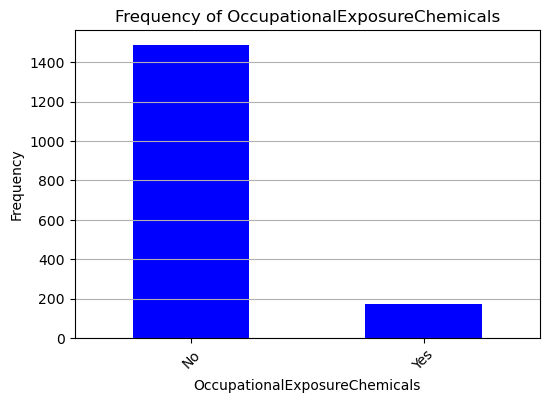

Distribution Summary of OccupationalExposureChemicals:
OccupationalExposureChemicals
No     89.692586
Yes    10.307414
Name: proportion, dtype: float64



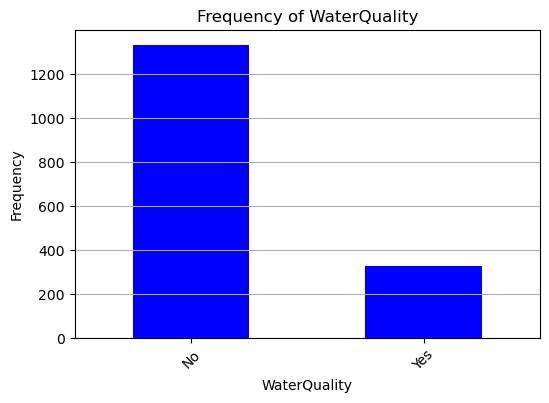

Distribution Summary of WaterQuality:
WaterQuality
No     80.289331
Yes    19.710669
Name: proportion, dtype: float64



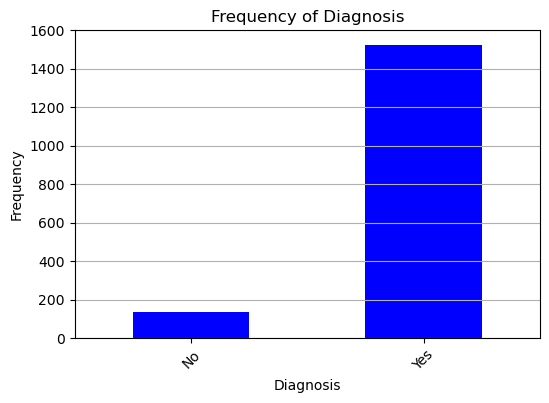

Distribution Summary of Diagnosis:
Diagnosis
No      8.137432
Yes    91.862568
Name: proportion, dtype: float64



In [110]:
# Add code for frequency tables/bar charts for categorical 

# Define mappings for each categorical variable

category_mappings = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'},
    'SocioeconomicStatus': {0: 'Low', 1: 'Middle', 2: 'High'}, 
    'EducationLevel':{0: 'None', 1: 'High School', 2: 'Bachelor', 3: 'Higher'},
    'Smoking': {0: 'No', 1: 'Yes'},
    'FamilyHistoryKidneyDisease':{0: 'No', 1: 'Yes'},
    'FamilyHistoryHypertension': {0: 'No', 1: 'Yes'},
    'FamilyHistoryDiabetes': {0: 'No', 1: 'Yes'},
    'PreviousAcuteKidneyInjury': {0: 'No', 1: 'Yes'},
    'UrinaryTractInfections': {0: 'No', 1: 'Yes'},
    'ACEInhibitors': {0: 'No', 1:'Yes'},
    'Diuretics': {0: 'No', 1:'Yes'},
    'Statins': {0: 'No', 1:'Yes'},
    'AntidiabeticMedications': {0: 'No', 1:'Yes'},
    'Edema': {0: 'No', 1:'Yes'},
    'HeavyMetalsExposure': {0: 'No', 1:'Yes'},
    'OccupationalExposureChemicals': {0: 'No', 1:'Yes'},
    'WaterQuality': {0: 'No', 1:'Yes'},
    'Diagnosis': {0: 'No', 1:'Yes'}
    }         

# List of categorical features

categorical_features = [
    # demographic
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications', 
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality',
    # Diagnosis
    'Diagnosis'
    ]

# Plot frequency tables and bar charts with updated labels
for feature in categorical_features:
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})
    
    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Create distribution summary
    prop_table = (df_mapped[feature].value_counts(normalize=True) * 100).sort_index()
    
    # Plotting
    plt.figure(figsize=(6, 4))
    freq_table.plot(kind='bar', color='blue')
    plt.title(f'Frequency of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  
    plt.grid(axis='y')  
    plt.show()

    # Display distribution summary
    print(f'Distribution Summary of {feature}:')
    print(prop_table)
    print()


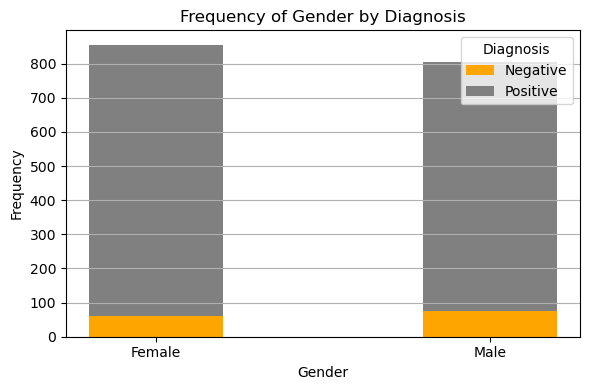

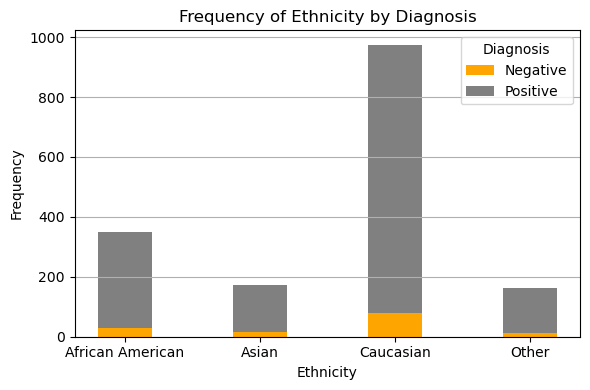

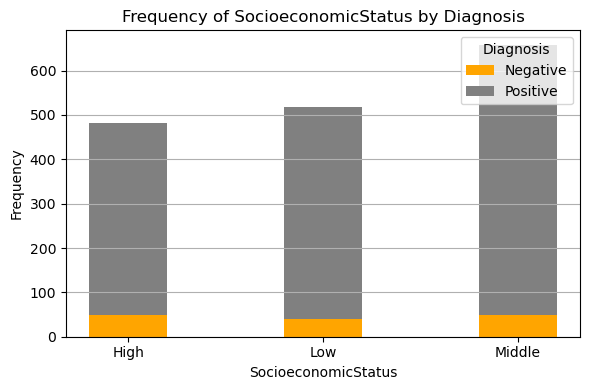

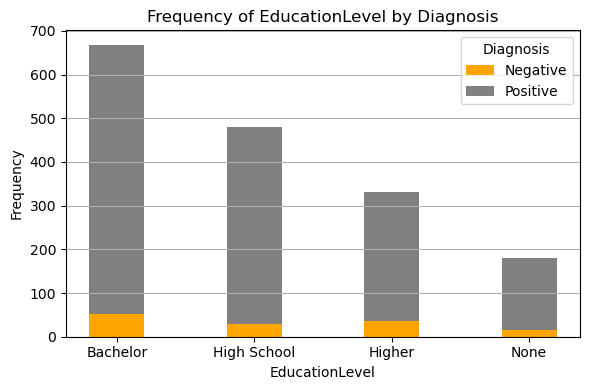

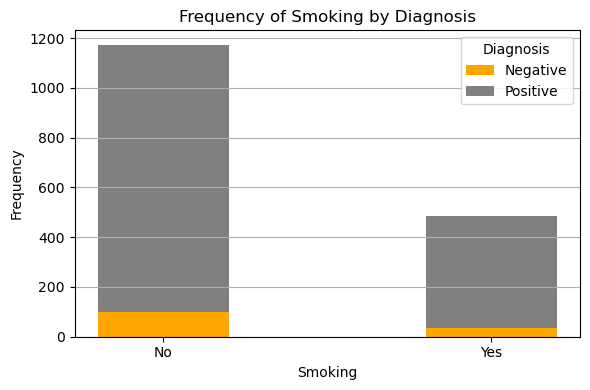

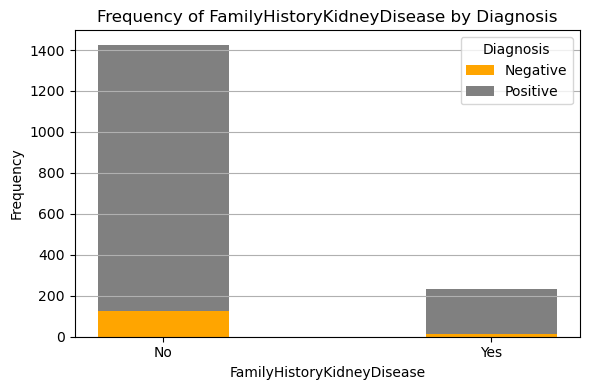

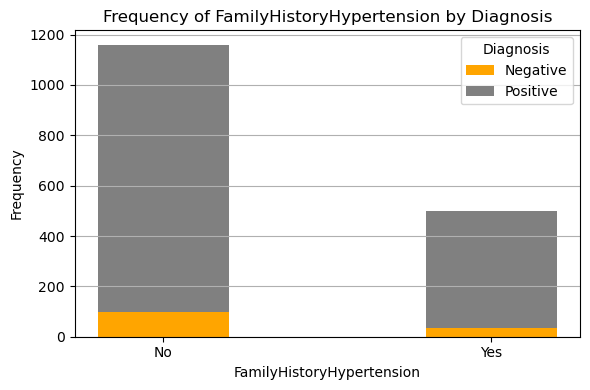

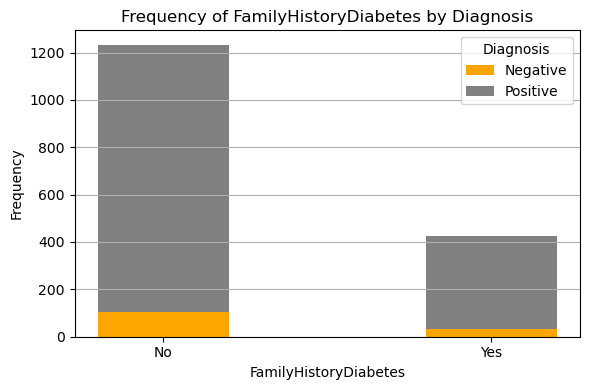

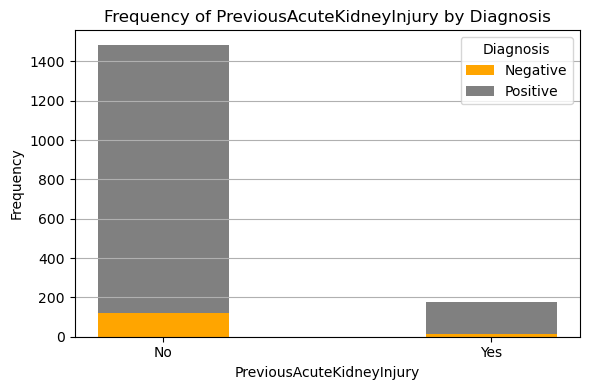

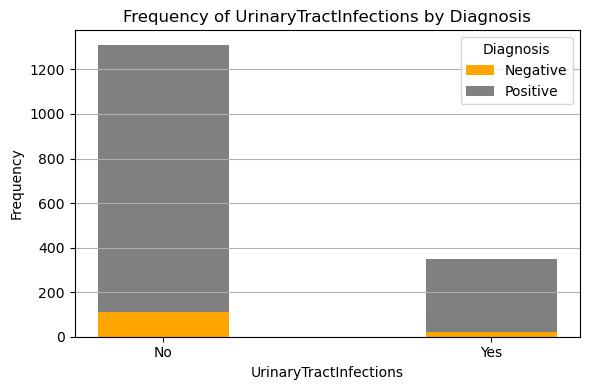

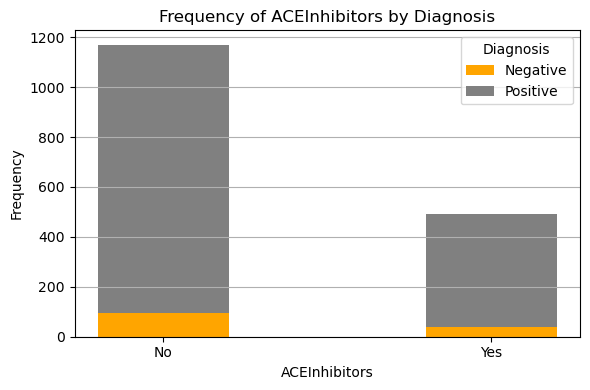

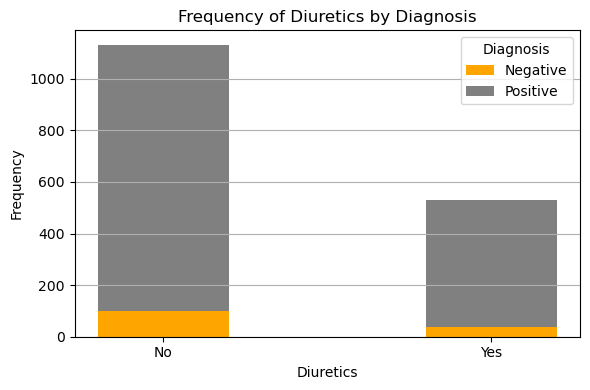

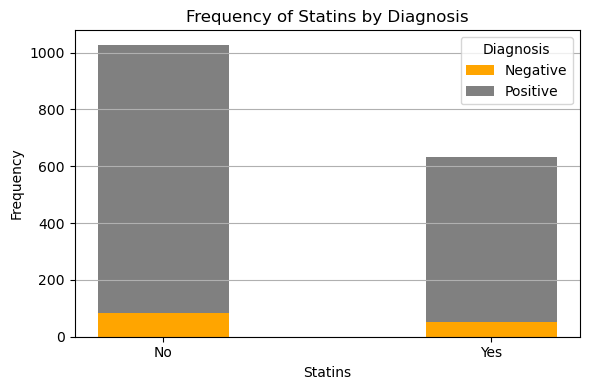

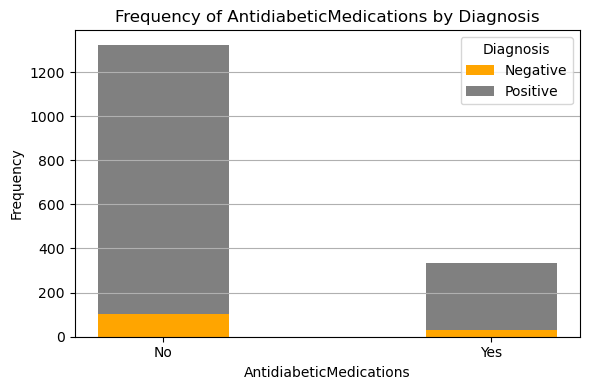

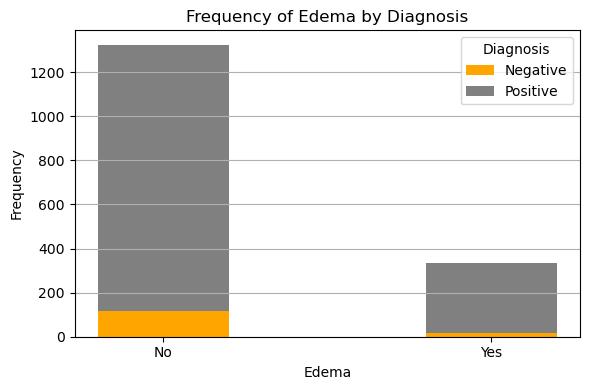

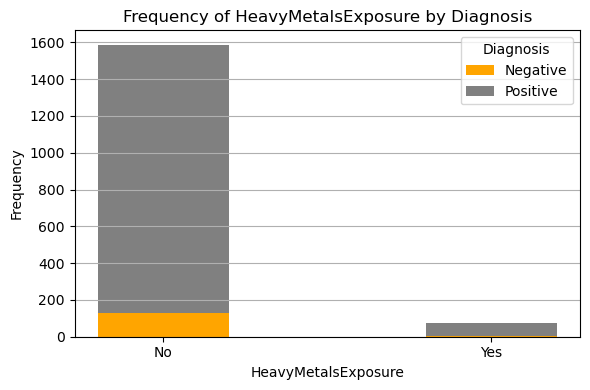

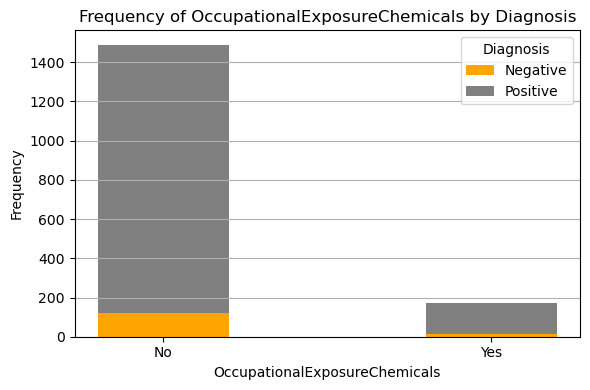

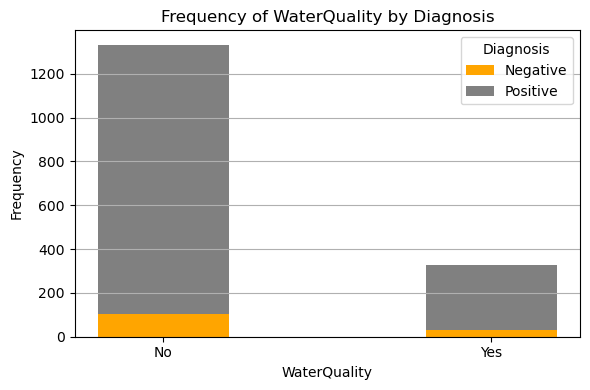

In [111]:
# Distribution of categorical variables by Diagnosis
# List of categorical features
categorical_features = [
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 
    'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications', 
    'Edema', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
]

# Plot frequency tables and bar charts with updated labels
for feature in categorical_features:
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})
    
    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()
    
    # Initialize plot with smaller figure size
    plt.figure(figsize=(6, 4))
    
    # Loop through each category
    for i, (index, value) in enumerate(freq_table.items()):
        # Calculate counts of positive and negative diagnoses
        positive_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 1)].shape[0]
        negative_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 0)].shape[0]
        
        # Plotting stacked bars with thinner width
        plt.bar(index, negative_count, color='orange', width=0.4, label='Negative' if i == 0 else None)
        plt.bar(index, positive_count, bottom=negative_count, color='grey', width=0.4, label='Positive' if i == 0 else None)
    
    # Set x-axis ticks and labels
    plt.xticks(freq_table.index, freq_table.index.map(str))
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {feature} by Diagnosis')
    plt.legend(title='Diagnosis', loc='upper right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

## 3. Bivariate Analysis

### 1. Correlation Analysis

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [80]:
# Add code for correlation matrix


# Anjali
### To be done


Visualize correlations using heatmaps to identify strong correlations (>0.5 or <-0.5) among variables.

Intrepret Correlation coefficient from the heatmap to indicate positive/negative/0/strength of relationships. For eg: test association of Edema and CKD diagnosis

In [81]:
# Add code for correlation heatmap


# Adithya
### To be done

### 2. Relationships with CKD

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


In [82]:
# Add code for box plot


# Katreyna
### To be done


Use t-tests to assess statistical differences in means between groups for continuous variables.

E.g: Perform a t-test to see if there is a significant difference in the Serum Creatinine levels (SerumCreatinine) between patients diagnosed with Chronic Kidney Disease (CKD) (Diagnosis = 1) and those without CKD (Diagnosis = 0).

Make the Hypothesis statement and Alternative hypothesis statement.

In [83]:
# add code for t-test

# Adithya
### To be done

## Models

Lets find what factors can predict the likelihood of a patient having Chronic Kidney Disease (CKD)?

## Logistic Regression

Lets use logistic regression to model the probability of CKD based on predictor variables. 
Variables: Age, Gender, Ethnicity, Clinical measurements, Lifestyle factors, Medical history as predictors (all variables); CKD diagnosis (Diagnosis) as the binary response variable.



In [84]:
# add code here

# Kateryna
### To be done

Plots to show the model:

1. ROC curve: Plot sensitivity vs. 1-specificity to evaluate model performance.

2. Variable coefficient plot: Display coefficients of predictors to understand their impact on CKD likelihood.

In [ ]:
# Add code here

# Anjali
### To be done

## Logistic regression analysis to determine odds ratios

Perform logistic regression analysis to determine odds ratios and assess the significance of variables such as hypertension, diabetes, and medication use in relation to Chronic Kidney Disease (CKD).
Choosing the following independent variables (predictors) to include in the logistic regression model:

1. Hypertension (FamilyHistoryHypertension)
2. Diabetes (FamilyHistoryDiabetes or AntidiabeticMedications)
3. Medication use (ACEInhibitors, Diuretics, Statins, NSAIDsUse, etc.)

In [ ]:
# Add code here

# Anjali
### To be done

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

In [ ]:
# Add code here

# Anjali
### To be done

## Linear Regression

Add action item here


# add description and action item

In [66]:
# Linear Regression Model
# Selecting independent variables
independent_vars = ['BUNLevels', 'SerumCreatinine', 'ProteinInUrine', 'HbA1c']

# Add constant to the independent variables
X = sm.add_constant(df[independent_vars])

# Dependent variable
y = df['GFR']

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print summary statistics
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                    GFR   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.200
Date:                Tue, 25 Jun 2024   Prob (F-statistic):              0.309
Time:                        10:07:29   Log-Likelihood:                -7996.5
No. Observations:                1659   AIC:                         1.600e+04
Df Residuals:                    1654   BIC:                         1.603e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              74.6169      4.041     

The linear regression model using BUNLevels, SerumCreatinine, ProteinInUrine, and HbA1c as predictors does not provide a good fit for predicting GFR in this dataset. The low R-squared (0.003), non-significant F-statistic with a p-value of 0.309, which is greater than 0.05, and non-significant coefficients (p-values> 0.05) indicate that these variables do not explain the variability in GFR adequately. Therefore, this model may not be useful for predicting GFR based on the included predictors in this dataset.